In [1]:
from fastai.imports import*
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [3]:
dataset = pd.read_csv("C:\\Users\\Anthony\\Desktop\\dataset csv\\Diario\\DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])
dataset.head(10)

,Data,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen
0,2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
1,2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
2,2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
3,2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
4,2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
5,2014-01-15,2.3465,27,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
6,2014-01-16,2.3677,1,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
7,2014-01-17,2.3595,15,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
8,2014-01-20,2.3329,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
9,2014-01-21,2.3602,21,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6


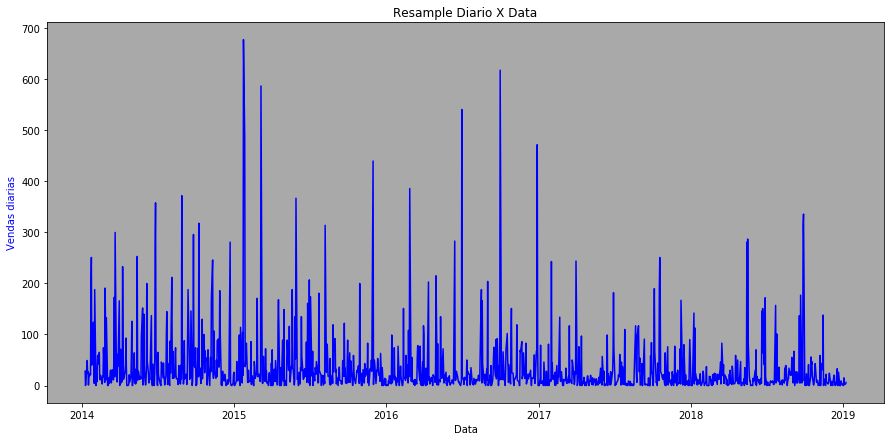

In [7]:
################### plot diario ############ 
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(df.index, df['QtdVendas'], 'b-')
plt.title('Resample Diario X Data') #adicionando o título

ax1.set_xlabel('Data')
ax1.set_ylabel('Vendas diarias', color='b')
ax1.set_facecolor('#A9A9A9')

plt.show()
plt.rcParams['figure.figsize'] = (15,7)

In [4]:
#dataset = dataset.dropna(how='all')
dataset['QtdVendas'] = dataset['QtdVendas'].replace([np.inf, -np.inf], np.nan)
dataset=dataset.dropna()

,Data,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen
0,2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
1,2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
2,2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
3,2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
4,2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
5,2014-01-15,2.3465,27,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
6,2014-01-16,2.3677,1,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
7,2014-01-17,2.3595,15,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
8,2014-01-20,2.3329,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
9,2014-01-21,2.3602,21,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6


In [5]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values

In [12]:
df_semVenda, y, nas = proc_df(df,'QtdVendas')

In [13]:
m=RandomForestRegressor(n_estimators = 10, random_state = 42)
m.fit(df_semVenda,y)
m.score(df_semVenda,y)

0.789737947714855

In [14]:
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  261                          #(20% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

train_features.shape, test_labels.shape, test_features.shape

((1044, 9), (261,), (261, 9))

In [15]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(df_semVenda[:1044],y[:1044])
#base_accuracy = evaluate(base_model, test_features, test_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
train_labels = df.QtdVendas[:1044]
test_labels = df.QtdVendas[1044:]
predictions = base_model.predict(test_features[:1044])

In [17]:
predictions_series = pd.Series(predictions, index=df.index[1044:])
train_series = pd.Series(train_labels, index=df.index[:1044])
test_series = pd.Series(test_labels, index=df.index[1045:])

C:\Users\Anthony\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


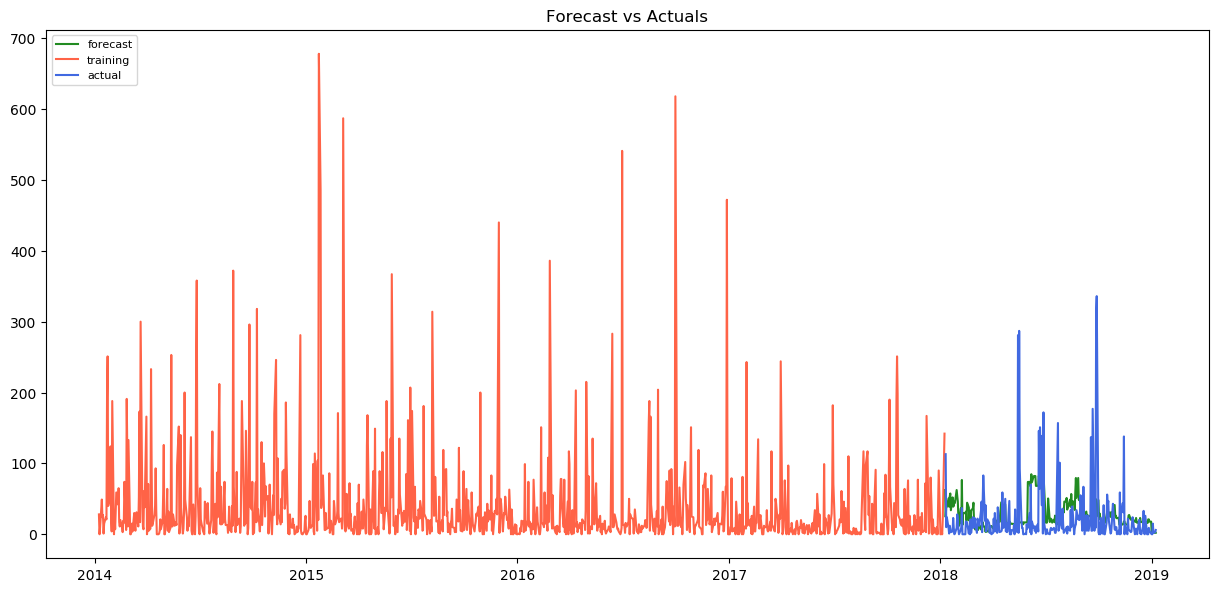

In [18]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(predictions_series, label='forecast',color='forestgreen')
plt.plot(train_series, label='training', color='tomato' )
plt.plot(test_series, label='actual',color = 'royalblue')
#plt.fill_between(train_labels.index, train_labels, test_labels, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


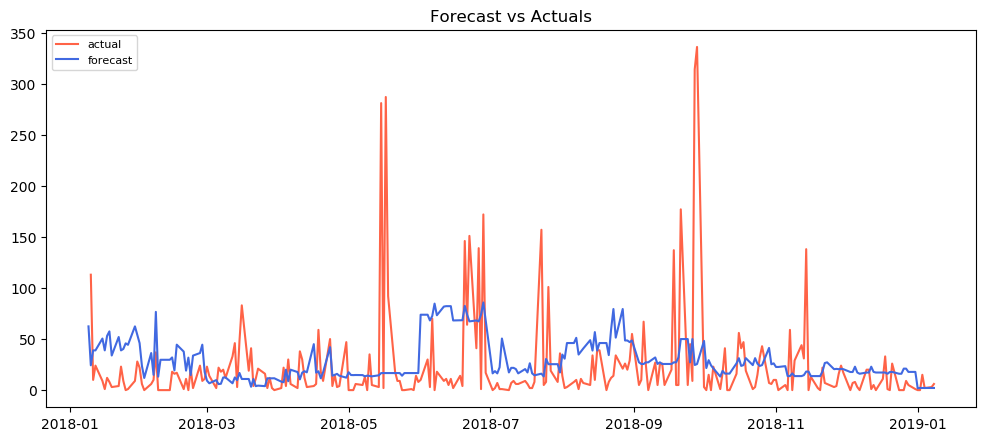

In [19]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_series, label='actual',color ='tomato')
plt.plot(predictions_series, label='forecast', color = 'royalblue')
#plt.fill_between(train_labels.index, train_labels, test_labels, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Estatistica da predição

In [30]:
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predictions, test_labels.values)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


{'mape': nan,
 'me': 0.2116237912789635,
 'mae': 10.799785623061485,
 'mpe': nan,
 'rmse': 18.987925916989408,
 'corr': 0.9289725249550407,
 'minmax': nan}